In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv('med dataset.csv')

In [3]:
df.head()

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23


In [4]:
# column types
df.dtypes

id             int64
age            int64
year           int64
sex            int64
glang          int64
part           int64
job            int64
stud_h         int64
health         int64
psyt           int64
jspe           int64
qcae_cog       int64
qcae_aff       int64
amsp           int64
erec_mean    float64
cesd           int64
stai_t         int64
mbi_ex         int64
mbi_cy         int64
mbi_ea         int64
dtype: object

In [5]:
# checking for missing values
df.isnull().sum() # no missing values

id           0
age          0
year         0
sex          0
glang        0
part         0
job          0
stud_h       0
health       0
psyt         0
jspe         0
qcae_cog     0
qcae_aff     0
amsp         0
erec_mean    0
cesd         0
stai_t       0
mbi_ex       0
mbi_cy       0
mbi_ea       0
dtype: int64

In [6]:
# removing the 'id' column
df.drop(['id'], axis=1, inplace=True)

In [7]:
# check for duplicates
df.duplicated().sum() # no duplicates

0

In [8]:
# separate the data into two groups: categorical and numerical
df_cat = df[['sex', 'year', 'part', 'glang', 'job', 'stud_h', 'health', 'psyt']]
df_num = df[['age', 'jspe', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']]

In [9]:
# Categorical Data
# Description
df_cat.head(20)

,sex,year,part,glang,job,stud_h,health,psyt
0,1,1,1,120,0,56,3,0
1,1,4,1,1,0,20,4,0
2,2,3,0,1,0,36,3,0
3,2,2,0,1,1,51,5,0
4,1,3,1,1,0,22,4,0
5,2,5,1,1,1,10,2,0
6,2,5,1,1,0,15,3,0
7,1,4,1,1,1,8,4,0
8,2,4,1,1,1,20,2,0
9,2,2,1,1,0,20,5,0


In [10]:
# Descriptive Statistics
df_cat.describe(include="all")

,sex,year,part,glang,job,stud_h,health,psyt
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,1.695260,3.102709,0.563205,14.327314,0.348758,25.288939,3.777652,0.224605
std,0.472665,1.763937,0.496269,32.366389,0.476847,15.927875,1.061497,0.417558
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,3.000000,0.000000
50%,2.000000,3.000000,1.000000,1.000000,0.000000,25.000000,4.000000,0.000000
75%,2.000000,5.000000,1.000000,1.000000,1.000000,36.000000,5.000000,0.000000
max,3.000000,6.000000,1.000000,121.000000,1.000000,70.000000,5.000000,1.000000


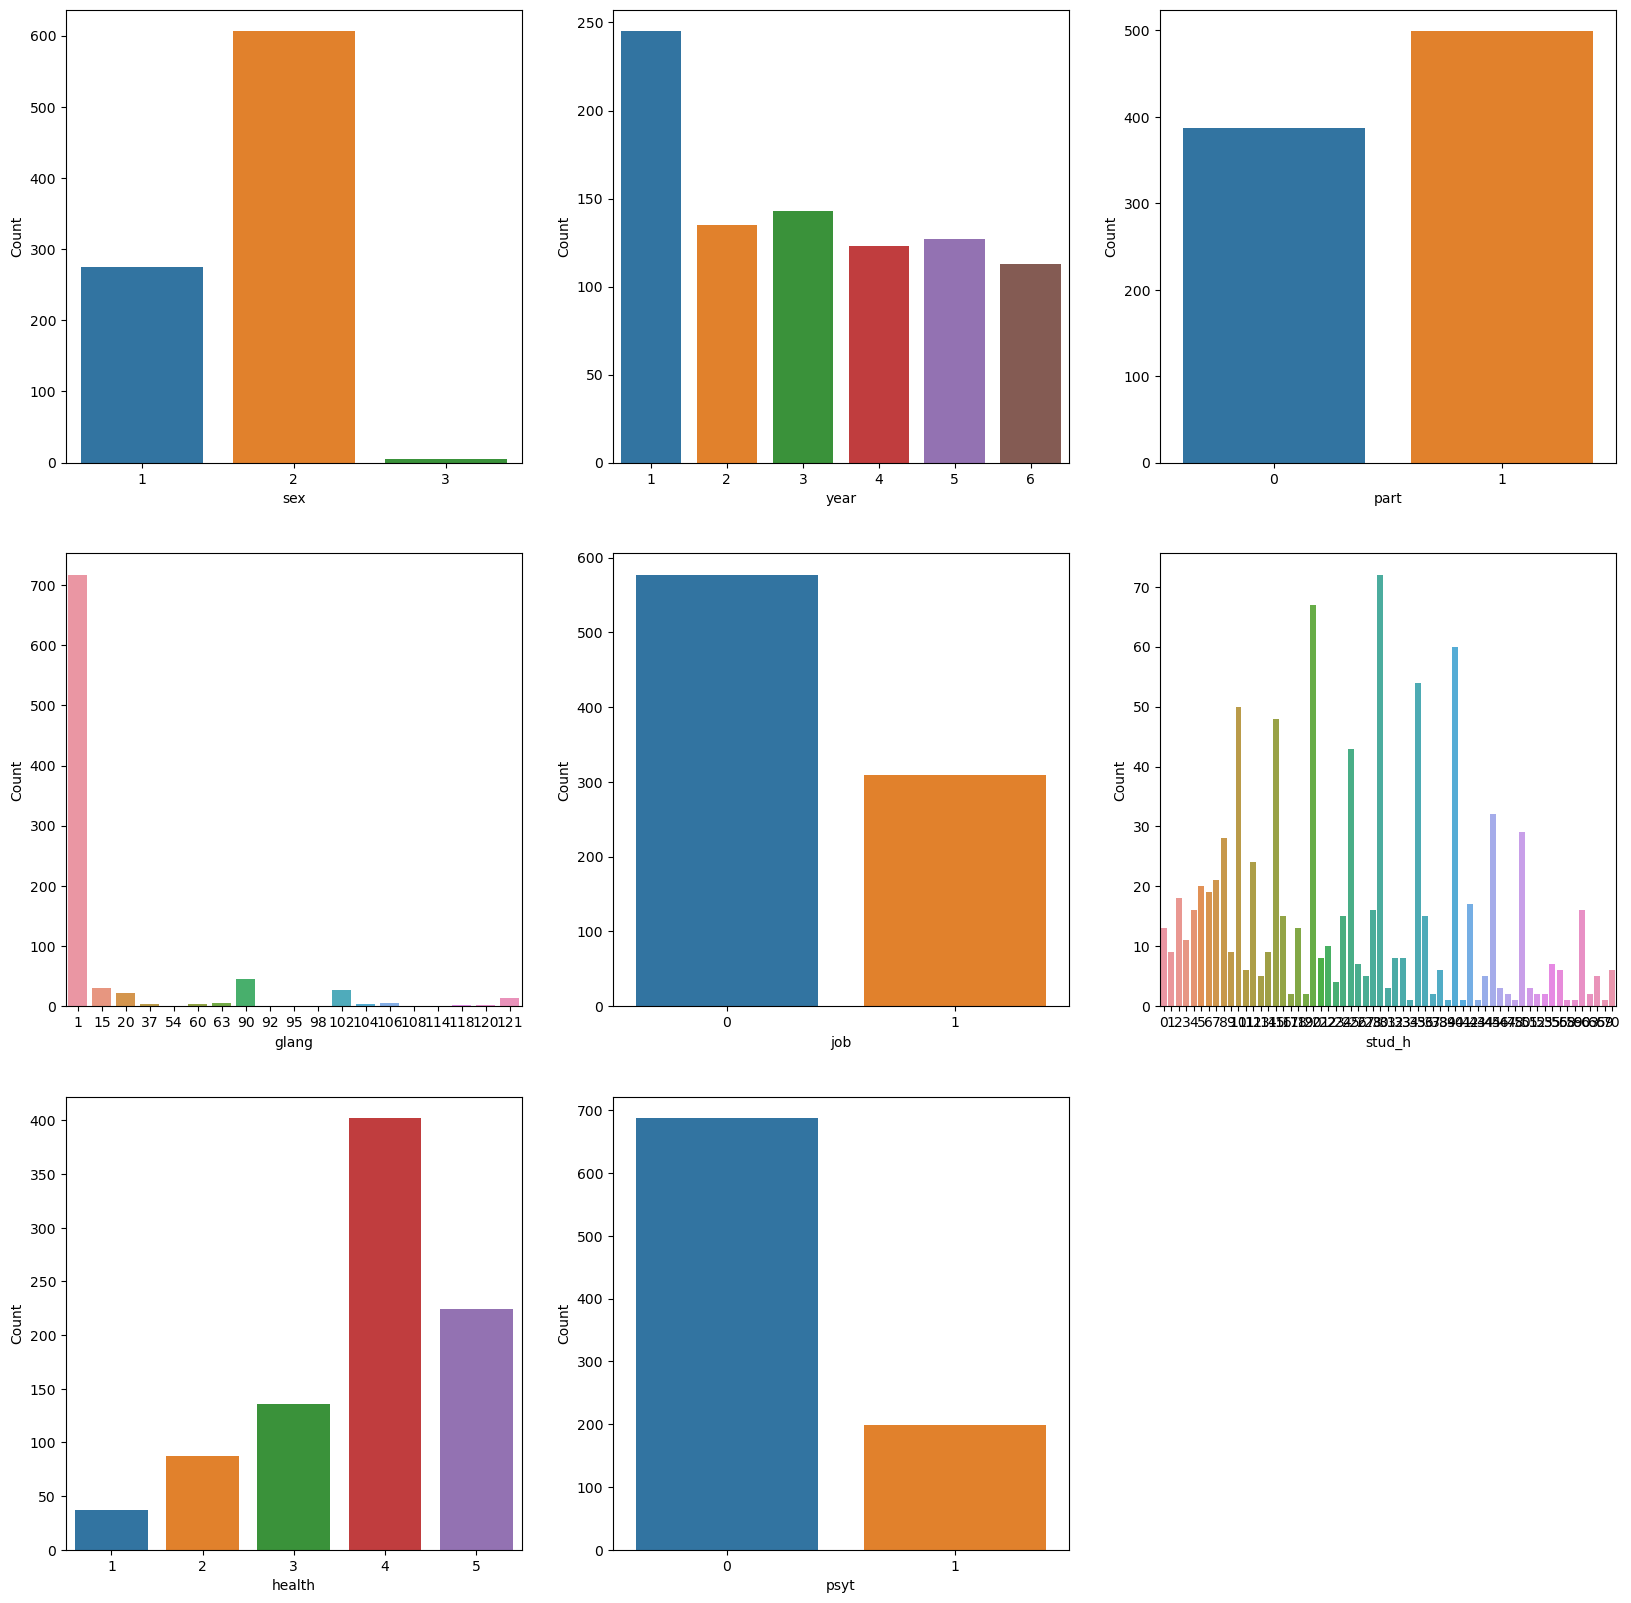

In [11]:
# Plotting the count of each category for each feature using Seaborn

# Set the figure size
plt.figure(figsize=(20, 20))

# Plot the count of each category for each feature
for i, col in enumerate(df_cat.columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=col, data=df_cat)
    plt.xlabel(col)
    plt.ylabel('Count')

In [12]:
# Finding relationships between categorical variables using Chi-Square test
from scipy.stats import chi2_contingency
# create an empty list to store the results
chi2_results = []

#Loop through each pair of categorical columns and perform Chi-Square test
for i, col1 in enumerate(df_cat.columns):
    for j, col2 in enumerate(df_cat.columns):
        if i < j:
            chi2, p, dof, ex = chi2_contingency(pd.crosstab(df_cat[col1], df_cat[col2]))
            chi2_results.append({'Variable 1': col1, 'Variable 2': col2, 'Chi-Square': chi2, 'p-value': p})

# Create a DataFrame from the results list
chi2_table = pd.DataFrame(chi2_results)

# Display the resulting DataFrame
print(chi2_table)

   Variable 1 Variable 2   Chi-Square       p-value
0         sex       year    12.769894  2.368234e-01
1         sex       part     6.787509  3.358236e-02
2         sex      glang    54.444023  2.496473e-02
3         sex        job     0.399311  8.190127e-01
4         sex     stud_h   102.535577  8.736027e-01
5         sex     health    21.975553  4.961357e-03
6         sex       psyt    23.484975  7.948815e-06
7        year       part    27.375938  4.818767e-05
8        year      glang   109.823807  7.634917e-02
9        year        job    72.560233  3.002212e-14
10       year     stud_h   608.992141  3.320205e-23
11       year     health    21.604790  3.623350e-01
12       year       psyt     4.315674  5.049176e-01
13       part      glang    22.638009  2.048861e-01
14       part        job     1.811389  1.783416e-01
15       part     stud_h    65.031867  3.058703e-01
16       part     health     7.025088  1.345683e-01
17       part       psyt     0.515159  4.729141e-01
18      glan

In [13]:
# Keep only the pairs of variables that are related (p-value < 0.05) and sort them by p-value in ascending order (the smaller the p-value, the stronger the relationship)
chi2_table = chi2_table[chi2_table['p-value'] < 0.05].sort_values(by='p-value')
chi2_table
#from the results, we can conclude that:
# sex and health are both related to psychoterapy in the last year
# sex and health are related
# how long students study is related to their health

,Variable 1,Variable 2,Chi-Square,p-value
10,year,stud_h,608.992141,3.320205e-23
9,year,job,72.560233,3.002212e-14
6,sex,psyt,23.484975,7.948815e-06
27,health,psyt,27.583952,1.514423e-05
7,year,part,27.375938,4.818767e-05
5,sex,health,21.975553,4.961357e-03
25,stud_h,health,293.764489,1.013227e-02
2,sex,glang,54.444023,2.496473e-02
22,job,stud_h,81.825491,3.207564e-02
1,sex,part,6.787509,3.358236e-02


In [14]:
# Percentage of each category for each pair of variables in chi2_table
for i, row in chi2_table.iterrows():
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    print(var1 + " and " + var2)
    print(pd.crosstab(index=df[var1], columns=df[var2], normalize=True))
    print('-----------------')

year and stud_h
stud_h        0         1         2         3         4         5         6   \
year                                                                           
1       0.001129  0.000000  0.000000  0.000000  0.001129  0.001129  0.006772   
2       0.000000  0.000000  0.000000  0.000000  0.001129  0.000000  0.001129   
3       0.002257  0.000000  0.002257  0.001129  0.000000  0.004515  0.001129   
4       0.001129  0.001129  0.001129  0.002257  0.004515  0.005643  0.003386   
5       0.002257  0.000000  0.003386  0.001129  0.001129  0.005643  0.001129   
6       0.007901  0.009029  0.013544  0.007901  0.010158  0.005643  0.007901   

stud_h        7         8         9   ...        53        55        56  \
year                                  ...                                 
1       0.009029  0.006772  0.004515  ...  0.001129  0.005643  0.005643   
2       0.002257  0.001129  0.000000  ...  0.001129  0.002257  0.001129   
3       0.003386  0.004515  0.000000  ...  

In [15]:
# relationships between psyt and sex
var1 = "psyt"
var2 = "sex"

# create a cross-tabulation table
ctab = pd.crosstab(df[var1], df[var2])

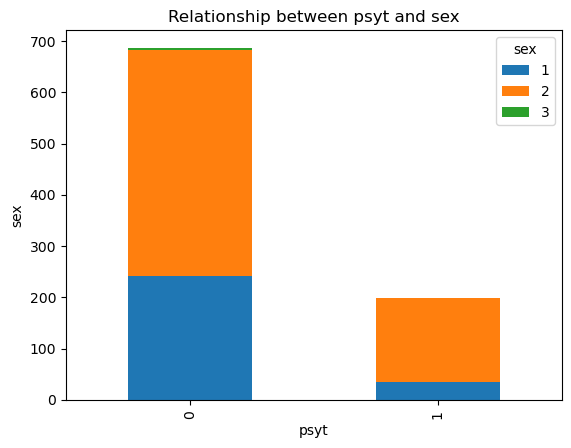

In [16]:
# plot the cross-tabulation table
ctab.plot(kind='bar', stacked = True)
plt.title("Relationship between " + var1 + " and " +var2)
plt.xlabel(var1)
plt.ylabel(var2)
plt.show()

In [17]:
# let's see what sex visited a psychoterapist the most in the last year

# create a new data frame
df_psyt = pd.DataFrame(data = {'psyt' : df_cat['psyt'], 'sex' : df_cat['sex']})

#group the data by psychoterapy and sex
df_psyt = df_psyt.groupby(['psyt', 'sex']).size().reset_index(name='count')

# calculate the male, female and non binary in each health category
total = df_psyt['count'].sum()
df_psyt['percentage'] = df_psyt['count']/total *100
df_psyt['sex'] = df_psyt['sex'].map({1: 'Male', 2: 'Female', 3: 'Non-binary'})
                               


In [18]:
df_psyt # females tend to visit the psychoterapist more than males or non-binary people

,psyt,sex,count,percentage
0,0,Male,241,27.200903
1,0,Female,442,49.887133
2,0,Non-binary,4,0.451467
3,1,Male,34,3.837472
4,1,Female,164,18.510158
5,1,Non-binary,1,0.112867


In [19]:
 # print each percentage for every pair of variables in chi2_table
for i, row in chi2_table.iterrows():
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    print(f"{var1} and {var2}")

    # Create a temporary DataFrame with the pair of variables
    df_temp = pd.DataFrame(data={var1: df_cat[var1], var2: df_cat[var2]})
    df_temp = df_temp.groupby([var1, var2]).size().reset_index(name='count')
    total = df_temp['count'].sum()
    df_temp['percentage'] = df_temp['count'] / total * 100
    # Append the sum of numeric columns
    sum_row = df_temp.sum(numeric_only=True)
    sum_row[var1] = 'Total'
    sum_row[var2] = ''
    df_temp = pd.concat([df_temp, pd.DataFrame(sum_row).T], ignore_index=True)

    print(df_temp)
    print('-----------------')

year and stud_h
      year stud_h  count percentage
0        1      0      1   0.112867
1        1      4      1   0.112867
2        1      5      1   0.112867
3        1      6      6   0.677201
4        1      7      8   0.902935
..     ...    ...    ...        ...
218      6     36      2   0.225734
219      6     40      3     0.3386
220      6     45      1   0.112867
221      6     50      1   0.112867
222  Total         886.0      100.0

[223 rows x 4 columns]
-----------------
year and job
     year job  count percentage
0       1   0    198   22.34763
1       1   1     47    5.30474
2       2   0    105  11.851016
3       2   1     30   3.386005
4       3   0     82   9.255079
5       3   1     61   6.884876
6       4   0     57   6.433409
7       4   1     66    7.44921
8       5   0     63   7.110609
9       5   1     64   7.223476
10      6   0     72   8.126411
11      6   1     41    4.62754
12  Total      886.0      100.0
-----------------
sex and psyt
     sex psyt  cou

In [20]:
# Numerical variables
df_num.head()

,age,jspe,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,18,88,27,17,0.738095,34,61,17,13,20
1,26,109,37,22,0.690476,7,33,14,11,26
2,21,106,39,17,0.690476,25,73,24,7,23
3,21,101,33,18,0.833333,17,48,16,10,21
4,21,102,28,21,0.690476,14,46,22,14,23


C:\Users\Oana\AppData\Local\Temp\ipykernel_15732\2063736890.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[col])


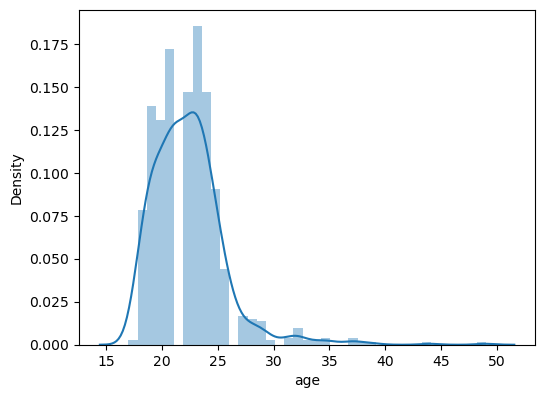

C:\Users\Oana\AppData\Local\Temp\ipykernel_15732\2063736890.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[col])


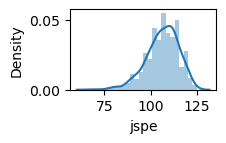

C:\Users\Oana\AppData\Local\Temp\ipykernel_15732\2063736890.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[col])


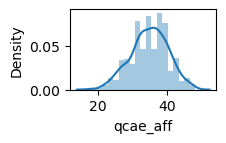

C:\Users\Oana\AppData\Local\Temp\ipykernel_15732\2063736890.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[col])


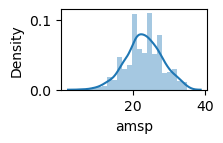

C:\Users\Oana\AppData\Local\Temp\ipykernel_15732\2063736890.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[col])


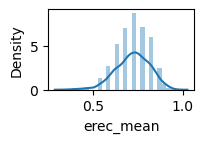

C:\Users\Oana\AppData\Local\Temp\ipykernel_15732\2063736890.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[col])


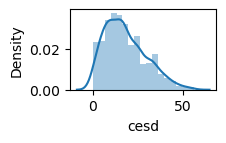

C:\Users\Oana\AppData\Local\Temp\ipykernel_15732\2063736890.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[col])


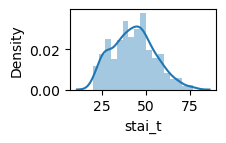

C:\Users\Oana\AppData\Local\Temp\ipykernel_15732\2063736890.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[col])


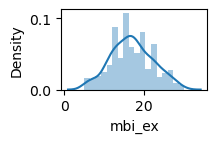

C:\Users\Oana\AppData\Local\Temp\ipykernel_15732\2063736890.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[col])


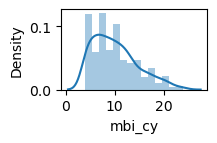

C:\Users\Oana\AppData\Local\Temp\ipykernel_15732\2063736890.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[col])


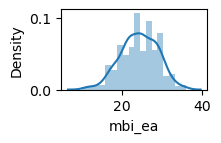

In [21]:
# Distribution of the numerical variables
plt.figure(figsize = (20,20))
for i, col in enumerate(df_num.columns):
    plt.subplot(4, 3, i+1)
    sns.distplot(df_num[col])
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

In [22]:
# Correlation matrix
corr_matrix = df_num.corr(method = 'pearson')
corr_matrix


,age,jspe,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
age,1.000000,0.223221,-0.008130,0.000477,-0.018699,-0.139106,-0.081893,-0.182733,-0.001853,0.046130
jspe,0.223221,1.000000,0.263384,0.099395,0.097062,-0.080058,-0.075036,-0.040542,-0.006981,0.082508
qcae_aff,-0.008130,0.263384,1.000000,-0.071391,0.141379,0.250947,0.331350,0.215886,0.128488,-0.113891
amsp,0.000477,0.099395,-0.071391,1.000000,0.002780,-0.152052,-0.249231,-0.073011,-0.029343,0.220616
erec_mean,-0.018699,0.097062,0.141379,0.002780,1.000000,0.029881,0.037688,0.015348,0.061965,-0.034889
cesd,-0.139106,-0.080058,0.250947,-0.152052,0.029881,1.000000,0.715728,0.605617,0.407727,-0.453589
stai_t,-0.081893,-0.075036,0.331350,-0.249231,0.037688,0.715728,1.000000,0.530486,0.331884,-0.462535
mbi_ex,-0.182733,-0.040542,0.215886,-0.073011,0.015348,0.605617,0.530486,1.000000,0.505200,-0.480821
mbi_cy,-0.001853,-0.006981,0.128488,-0.029343,0.061965,0.407727,0.331884,0.505200,1.000000,-0.565939
mbi_ea,0.046130,0.082508,-0.113891,0.220616,-0.034889,-0.453589,-0.462535,-0.480821,-0.565939,1.000000


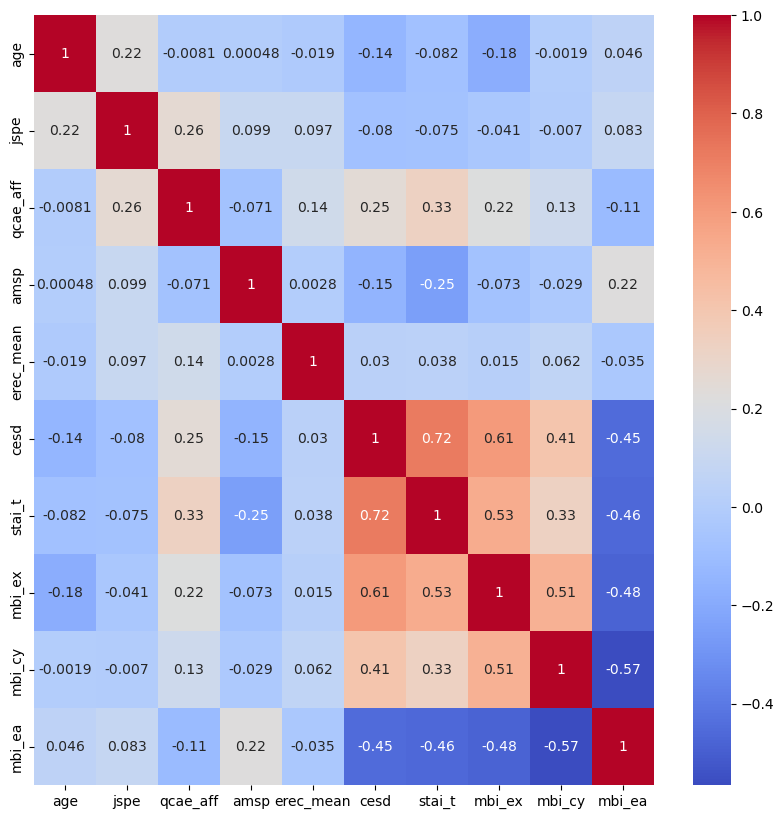

In [23]:
# heatmap of the correlation matrix
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [24]:
# get a dataframe of the the most to least correlated variables
corr_matrix = corr_matrix.unstack().reset_index()
corr_matrix.columns = ['Variable 1', 'Variable 2', 'Correlation']
corr_matrix = corr_matrix[corr_matrix['Variable 1'] != corr_matrix['Variable 2']]
corr_matrix = corr_matrix.sort_values(by = 'Correlation', ascending = False)
corr_matrix

,Variable 1,Variable 2,Correlation
65,stai_t,cesd,0.715728
56,cesd,stai_t,0.715728
75,mbi_ex,cesd,0.605617
57,cesd,mbi_ex,0.605617
67,stai_t,mbi_ex,0.530486
...,...,...,...
96,mbi_ea,stai_t,-0.462535
79,mbi_ex,mbi_ea,-0.480821
97,mbi_ea,mbi_ex,-0.480821
89,mbi_cy,mbi_ea,-0.565939


In [25]:
# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [26]:
# standardize the data
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)

# create a PCA instance
pca = PCA(n_components = 0.95)

# fit the PCA instance to the scaled samples
pca.fit(df_num_scaled)

# transform the scaled samples
pca_features = pca.transform(df_num_scaled)

# print the shape of the pca features
print("The shape of the PCA is: ", pca_features.shape)

The shape of the PCA is:  (886, 9)


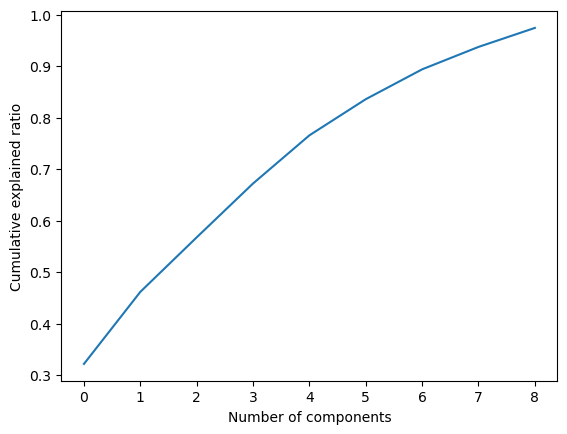

In [27]:
# plot the cumulative sum of the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained ratio')
plt.show()
# the explained variance tells how much information can be attributed to each of the principal components


In [28]:
# loadings = coefficients that describe how each variable contributes to the principal components
loadings = pd.DataFrame({'Feature' : df_num.columns, 'PC1' : pca.components_[0], 'PC2': pca.components_[1], 'PC3' : pca.components_[2], 'PC4' : pca.components_[3]})
loadings

,Feature,PC1,PC2,PC3,PC4
0,age,-0.096826,0.383863,0.700289,-0.143540
1,jspe,-0.046286,0.680183,0.093058,0.065010
2,qcae_aff,0.208184,0.509245,-0.318282,-0.204569
3,amsp,-0.151479,0.121522,-0.109618,0.827293
4,erec_mean,0.045743,0.326902,-0.455469,0.052569
5,cesd,0.461591,-0.028029,-0.079636,-0.026066
6,stai_t,0.450715,0.022358,-0.074328,-0.221556
7,mbi_ex,0.442653,-0.033443,-0.030296,0.220002
8,mbi_cy,0.373686,0.036472,0.299290,0.378758
9,mbi_ea,-0.410257,0.072821,-0.278935,-0.067228


In [29]:
# sort the loadings in descending order
loadings = loadings.sort_values(by = ['PC1', 'PC2', 'PC3', 'PC4'], ascending = False)
loadings.head(20)
# for the first pc, the variables with the highest absolute loadings are 'cesd', 'stai_t' and 'mbi_ex'
# for the second pc, the variables with the highest absolute loadings is 'jspe'
# for the third pc - 'erec_mean'
# for the fourth pc - 'amsp'

,Feature,PC1,PC2,PC3,PC4
5,cesd,0.461591,-0.028029,-0.079636,-0.026066
6,stai_t,0.450715,0.022358,-0.074328,-0.221556
7,mbi_ex,0.442653,-0.033443,-0.030296,0.220002
8,mbi_cy,0.373686,0.036472,0.299290,0.378758
2,qcae_aff,0.208184,0.509245,-0.318282,-0.204569
4,erec_mean,0.045743,0.326902,-0.455469,0.052569
1,jspe,-0.046286,0.680183,0.093058,0.065010
0,age,-0.096826,0.383863,0.700289,-0.143540
3,amsp,-0.151479,0.121522,-0.109618,0.827293
9,mbi_ea,-0.410257,0.072821,-0.278935,-0.067228


In [30]:
# Clustering
from sklearn.cluster import KMeans

C:\Users\Oana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Oana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Oana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Oana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

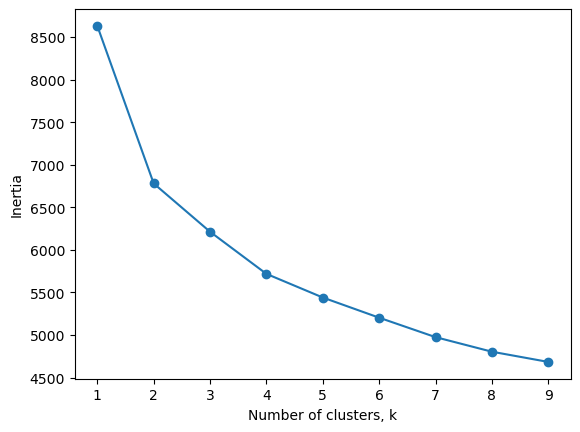

In [32]:
# determine the optimal number of clusters
# create a list of inertia values for different k values
inertia = []
for k in range (1,10):
    # create a KMeans instance with k clusters
    model = KMeans(n_clusters = k)
    #fit model to samples
    model.fit(pca_features)
    #append the inertia to the list of inertias
    inertia.append(model.inertia_)

# plot the ks vs inertias
plt.plot(range(1,10), inertia, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.show()

# the  point where the inertia begins to decrease more slowly is a good choice for the number of clusters

In [34]:
# we choose n=3 clusters
model = KMeans(n_clusters = 3)
clusters = model.fit_predict(pca_features)

C:\Users\Oana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Oana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


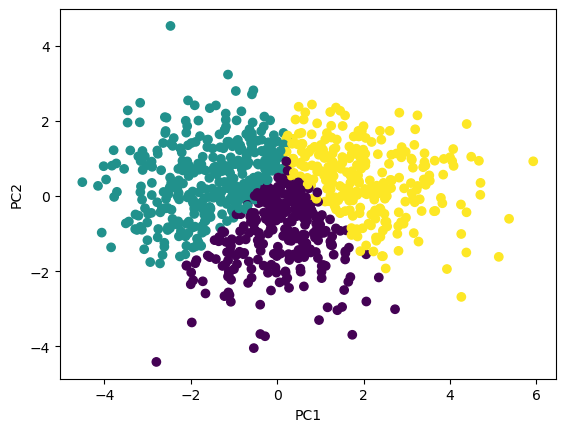

In [35]:
# create a scatter plot of the first two principal components
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap = 'viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [36]:
# extracting the cluster labels
clusters_labels  = model.labels_


In [37]:
# adding the cluster labels to the original data frame
df_clustered = df_num.copy()
df_clustered['Cluster'] = clusters_labels
df_clustered.head()



,age,jspe,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea,Cluster
0,18,88,27,17,0.738095,34,61,17,13,20,0
1,26,109,37,22,0.690476,7,33,14,11,26,1
2,21,106,39,17,0.690476,25,73,24,7,23,2
3,21,101,33,18,0.833333,17,48,16,10,21,0
4,21,102,28,21,0.690476,14,46,22,14,23,0


In [38]:
# grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('Cluster')
cluster_properties = cluster_grouped.mean()
print(cluster_properties)

               age        jspe   qcae_aff       amsp  erec_mean       cesd  \
Cluster                                                                      
0        20.737410   99.460432  32.798561  22.514388   0.691076  18.165468   
1        23.639769  110.198847  34.106628  24.688761   0.723823   9.481268   
2        22.467433  108.655172  37.800766  21.781609   0.746214  29.321839   

            stai_t     mbi_ex     mbi_cy     mbi_ea  
Cluster                                              
0        43.348921  17.208633   9.708633  23.798561  
1        34.354467  13.097983   7.593660  27.268012  
2        53.777778  21.551724  13.777778  20.574713  


In [39]:
cluster_grouped.size()

Cluster
0    278
1    347
2    261
dtype: int64

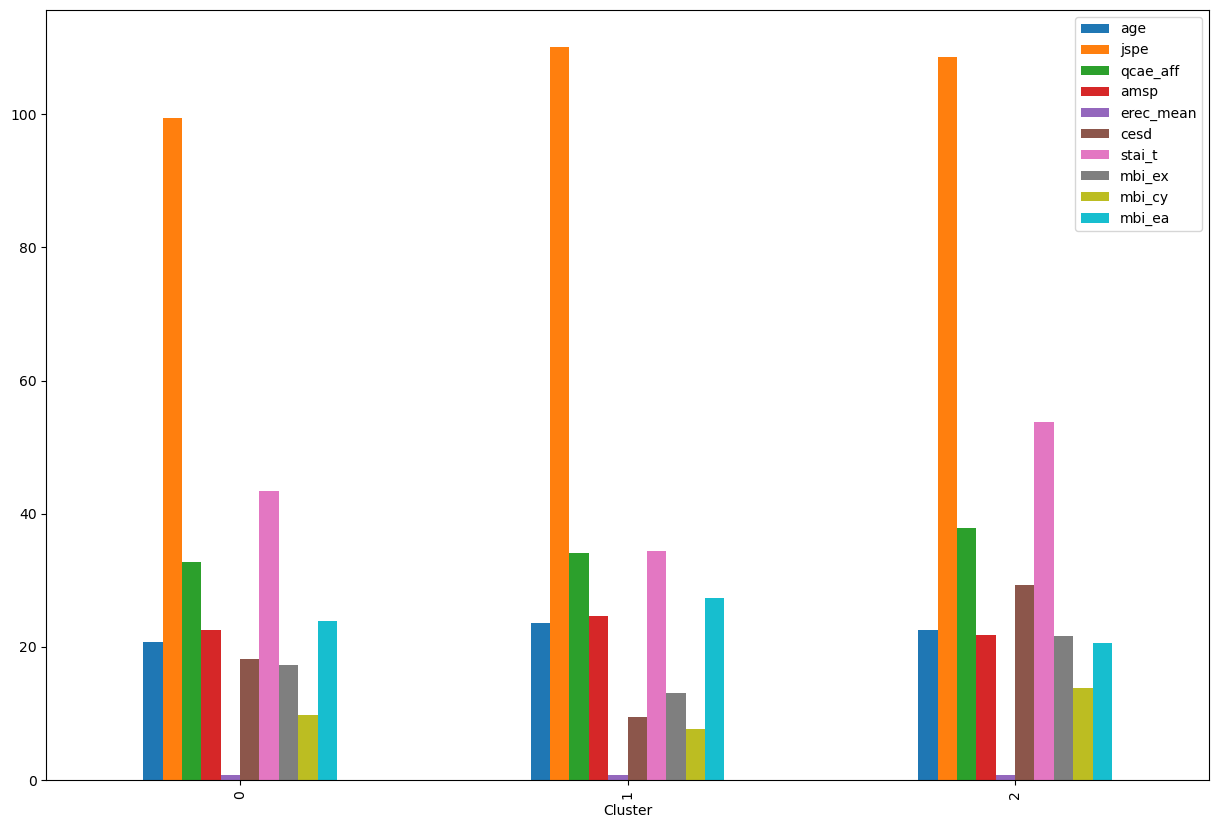

In [41]:
# plotting the properties for each cluster
cluster_properties.plot(kind = 'bar', figsize = (15,10))
plt.show()

# Cluster 0 is the cluster with the lowest values of the variables; the patients in this cluster have the lowest level of anxiety, stress and depression
# Cluster 1 is the cluster with the intermediate values of the variables; the patients in this cluster have an intermediate level of anxiety, stress and depression
# Cluster 2 is the cluster with the highest values of the variables; the patients in this cluster have the highest level of anxiety, stress and depression

In [42]:
# Machine Learning
# Logistic Regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_features, clusters_labels, test_size = 0.2, random_state = 42)

In [45]:
# create a logistic regression classifier
logreg = LogisticRegression()

In [46]:
# fit the classifier to the training data
logreg.fit(X_train, y_train)

LogisticRegression()

In [47]:
# predict the labels of the test set
y_pred = logreg.predict(X_test)

In [49]:
# compute and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}" .format(accuracy))

Accuracy: 0.9887640449438202


In [50]:
# Model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [51]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        58
           1       0.98      1.00      0.99        65
           2       0.98      1.00      0.99        55

    accuracy                           0.99       178
   macro avg       0.99      0.99      0.99       178
weighted avg       0.99      0.99      0.99       178

[[56  1  1]
 [ 0 65  0]
 [ 0  0 55]]


In [52]:
# precision is the ability of the classifier not to label a positive sample that is negative
# recall is the ability of the classifier to find all positive labels
# f1-score is the weighted average of the precision and recall
# support is the number of occurrences of each class in  y_test 

In [ ]:
# CONCLUSION
# In this project, I used the chi-square test to determine the relationships between the categorical variables
# For continuous variables, I used the Pearson correlation coefficient to determine the association between the variables. Then, I used PCA to reduce the dimensionality of the
# data set, and I used the K-Means clustering algorithm to cluster the patients into 3 groups based on the levels of anxiety, depression and stress. Also, I used the Logistic
# Regression model to predict the cluster labels of the patients based on the principal components. The accuracy of the model is 98%, which means that the model is able to predict the cluster
# labels 